# Logistic Regression

## Содержание
1. [Задача](#Задача)
2. [Данные](#Данные)
3. [Гистограмма таргета](#Гистограмма-таргета)
4. [Разбиение на обучающий и тестовый наборы данных](#Разбиение-на-обучающий-и-тестовый-наборы-данных.)
5. [Масштабирование данных](#Масштабирование-данных)
6. [Модель логистической регрессии](#Модель-логистической-регрессии)
7. [Лучшие параметры модели](#Лучшие-параметры-модели)
8. [Оценка модели](#Оценка-модели)
9. [Матрица ошибок](#Матрица-ошибок)
10. [ROC Curve](#ROC-Curve)
11. [Precision Recall curve](#Precision-Recall-curve)
12. [Загрузка модели](#Загрузка-модели)

## Задача: 
**Создать модель классификации для предосказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов.  
Они сдают кровь и выполняют небольшой физический тест.  
Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [26]:
df = pd.read_csv("../DATA/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df["target"].unique()

array([1, 0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Гистограмма таргета
### Для определения наличия дисбаланса классов

<Axes: xlabel='target', ylabel='count'>

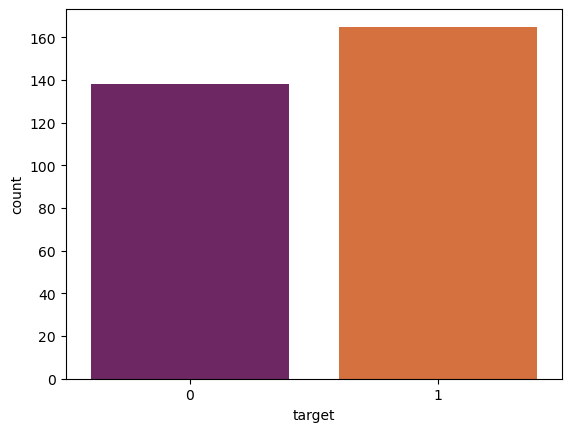

In [7]:
sns.countplot(data=df, x="target", palette="inferno")

## Визуализация графика pairplot, показывающая связи между:
- age
- trestbps
- chol
- thalach
- target

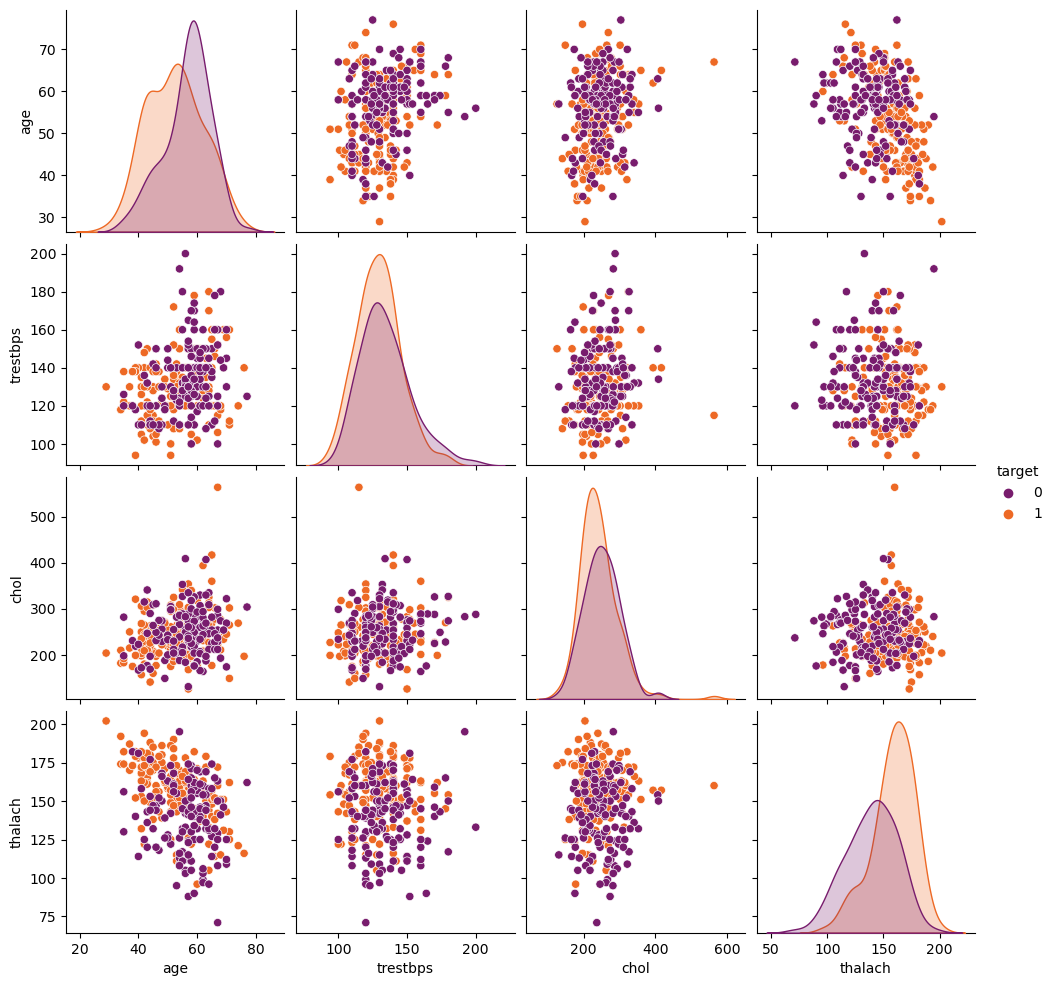

In [8]:
sns.pairplot(
    data=df[["age", "trestbps", "chol", "thalach", "target"]],
    hue="target",
    palette="inferno",
)

### Heatmap, показывающий корреляции между всеми колонками

<Axes: >

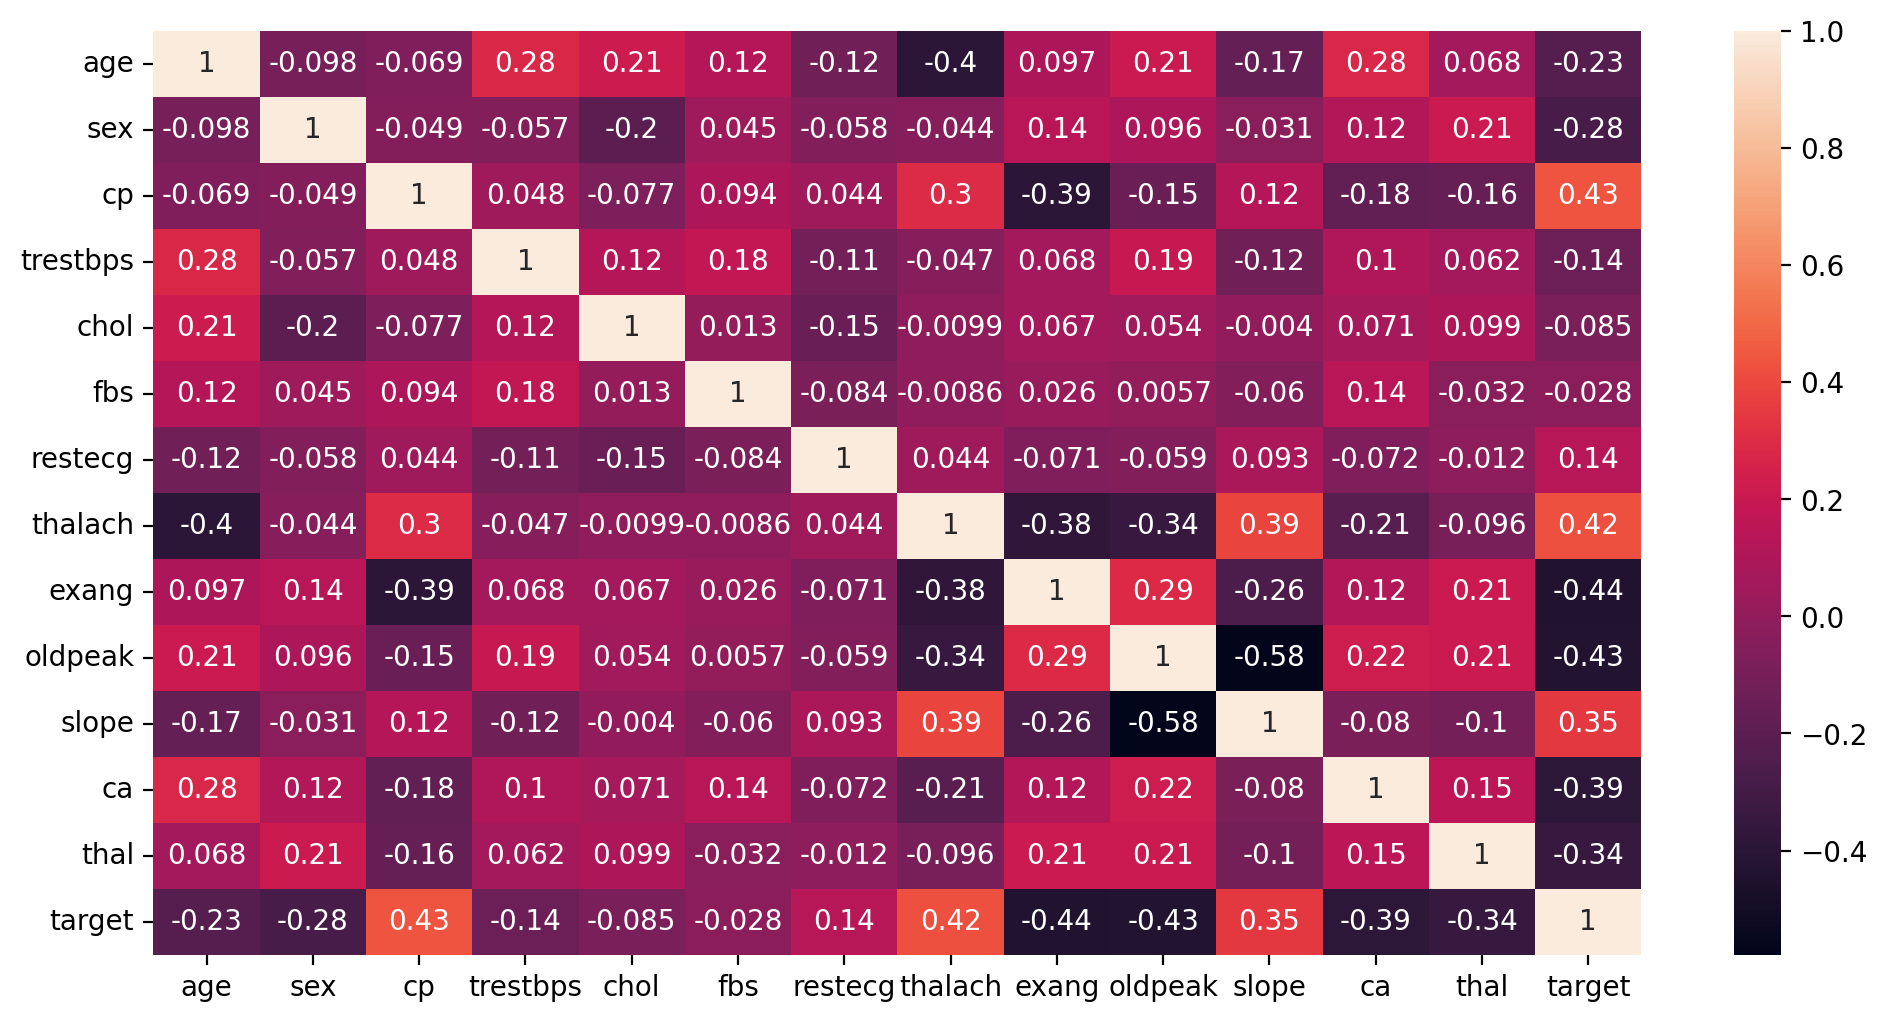

In [9]:
plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(data=df.corr(), annot=True)

### Из последней строки можем сделать вывод о средней корреляции признаков с целевой переменной

---
## Разбиение на обучающий и тестовый наборы данных

In [10]:
X = df.drop(columns=["target"], axis=1)
y = df["target"]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=101
)

## Масштабирование данных

In [12]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

Scaled_X_train = Scaler.fit_transform(X_train)
Scaled_X_test = Scaler.transform(X_test)

## Модель логистической регрессии

**Cомбинируем LogisticRegression и GridSearchCV**

In [14]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(solver="saga", multi_class="ovr", max_iter=1000)

In [15]:
from sklearn.model_selection import GridSearchCV

penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 10)
C = np.logspace(1, 10, 20)

param_grid = {"penalty": penalty, "l1_ratio": l1_ratio, "C": C}

grid_model = GridSearchCV(estimator=LR_model, param_grid=param_grid, cv=5, verbose=1)

In [16]:
import warnings

warnings.simplefilter(action="ignore", category=Warning)
grid_model.fit(Scaled_X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+01, 2.97635144e+01, 8.85866790e+01, 2.63665090e+02,
       7.84759970e+02, 2.33572147e+03, 6.95192796e+03, 2.06913808e+04,
       6.15848211e+04, 1.83298071e+05, 5.45559478e+05, 1.62377674e+06,
       4.83293024e+06, 1.43844989e+07, 4.28133240e+07, 1.27427499e+08,
       3.79269019e+08, 1.12883789e+09, 3.35981829e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

## Лучшие параметры модели

In [17]:
grid_model.best_params_

{'C': 10.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [18]:
grid_model.best_estimator_

LogisticRegression(C=10.0, l1_ratio=0.0, max_iter=1000, multi_class='ovr',
                   penalty='l1', solver='saga')

In [19]:
grid_model.best_estimator_.coef_

array([[-0.06441755, -0.7769036 ,  0.93687803, -0.27710341, -0.23054831,
         0.04228893,  0.12199739,  0.45122619, -0.43463319, -0.543893  ,
         0.39759897, -0.89256276, -0.59557719]])

---------

## Оценка модели
**Построим:**

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [20]:
from sklearn.metrics import (
    precision_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)

y_pred = grid_model.predict(Scaled_X_test)
print("predicted values:", y_pred)
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

predicted values: [0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0]
Accuracy: 0.84


----
## Матрица ошибок

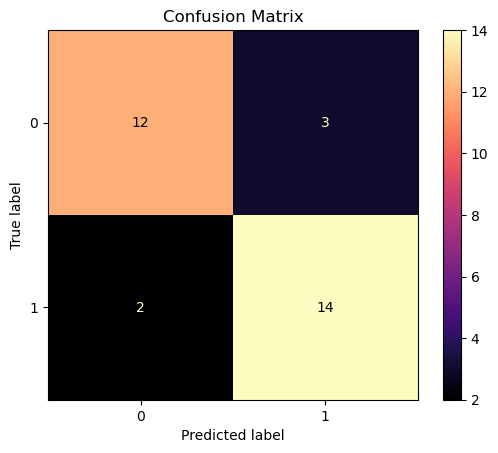

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="magma")
plt.title("Confusion Matrix")
plt.show()

In [22]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



## ROC Curve

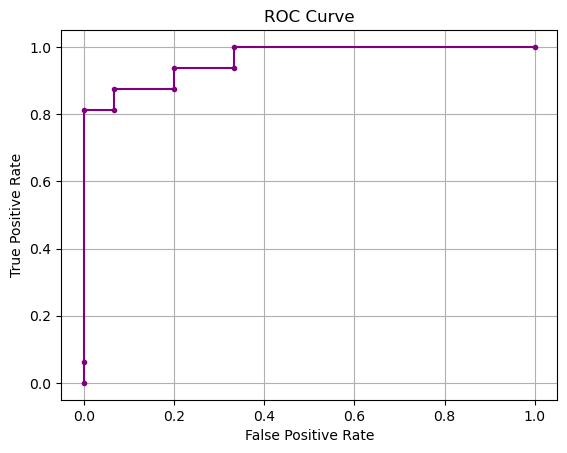

In [23]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred = grid_model.predict_proba(Scaled_X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, marker=".", color="purple")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.show()

## Precision Recall curve

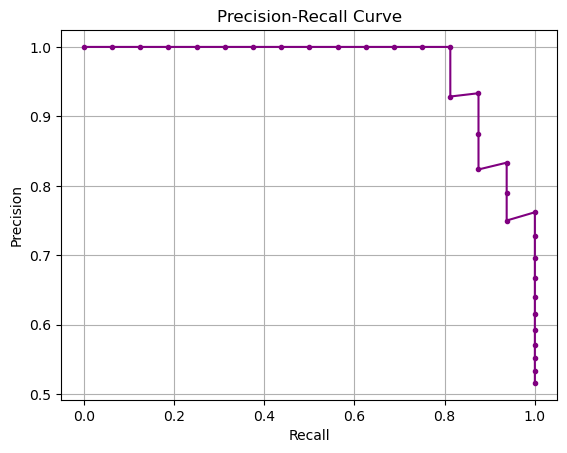

In [24]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, marker=".", color="purple")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

###  В офис клиники пришёл пациент со следующими значениями признаков:
    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0
    
> Необходимо получить предсказание модели и оценить насколько модель "уверена" в своём прогнозе?

In [25]:
patient = [[54.0, 1.0, 0.0, 122.0, 286.0, 0.0, 0.0, 116.0, 1.0, 3.2, 1.0, 2.0, 2.0]]
print(f"Предсказание модели: {grid_model.predict(Scaler.transform(patient))}")
print(
    f"Вероятность класса [0, 1]: {grid_model.predict_proba(Scaler.transform(patient))}"
)

Предсказание модели: [0]
Вероятность класса [0, 1]: [[0.99249806 0.00750194]]


## Загрузка модели

In [28]:
import joblib

file_path = "grid_model.pkl"
joblib.dump(grid_model, file_path)

['grid_model.pkl']

In [ ]:
!ruff format Logistic_Regression.ipynb